# Figure 4 - Model Performance

## Retrieve the relevant files.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import os, sys, random
import pickle as pkl
from os.path import exists, join
sys.path.append('../dependencies/')
sys.path.append('../functionScripts/')

import helperFunctions as hf
import plotFunctions as pf

# Figure dir
figDir = os.path.join(os.getcwd(), 'figures_output')
if not os.path.isdir(figDir):
    os.makedirs(figDir)

# Define the target directory
targDir = "C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\\1.scaled_Output\\classif"

# Define a list of substrings to filter directories
tagList = ['data=count_norm-', 'PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100']
# tagList = ['data=count_norm-', 'PowerTrans_RobScal_fSel_MrmrFS(30)_clf_LogReg(multinom)_CV20']
# tagList = ['data=count_norm-', 'PowerTrans_RobScal_fSel_SelectKBest(k=30)_clf_LogReg(multinom)_CV100']

# Call the function and get the list of paths based on the tagList
score_dict_paths = []

# Walk through the directory and its subdirectories
for root, dirs, files in os.walk(targDir):
    # Check if 'scoreDict.pkl' is present in the files
    if 'scoreDict_Real.pkl' in files:
        if all(tag in root for tag in tagList):
            score_dict_paths.append(os.path.join(root, 'scoreDict_Real.pkl'))

# Each directory name will be used to generate a label, based on the sequence between the strings in the directory name below
startStr = 'count_norm-'
endStr = '\PowerTrans'
aucScores, meanScores, aucScrambleScores, meanScrambleScores, scoreNames, featureLists  = [], [], [], [], [], []

# Print the result
print(f"Found 'scoreDict.pkl' files in directories containing {tagList}:")
for path in score_dict_paths:
    print(path)

    # Load the scoreDict.pkl file and extract desired accuracy.
    with open(path, 'rb') as f:                 
        featureDict = pkl.load(f)

        meanScores.append(np.mean(featureDict['scores']))
        aucScores.append(featureDict['auc']['Mean'])
        featureLists.append(featureDict['featuresPerModel'])
    
    # Extract the label for the entry
    scoreNames.append(featureDict['compLabel'])

    # Load the scrambled dicts
    scramblePath = path.replace('_Real', '_Shuffle')
    with open(scramblePath, 'rb') as f:                 
        featureDict = pkl.load(f)

        meanScrambleScores.append(np.mean(featureDict['scores']))
        aucScrambleScores.append(featureDict['auc']['Mean'])

Found 'scoreDict.pkl' files in directories containing ['data=count_norm-', 'PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100']:
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-5HT2A\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-5HTR\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-DT\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-PsiDF\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_cFos_Pipeline\1.scaled_Output\classif\data=count_norm-PsiDMT\PowerTrans_RobScal_fSel_BorFS_clf_LogReg(multinom)_CV100\scoreDict_Real.pkl
C:\OneDrive\KwanLab\Lightsheet_c

In [17]:
# Modifying Score names
translate_dict = hf.create_translation_dict('classToDrug')
scoreNames = hf.replace_strings_with_dict(scoreNames, translate_dict)

# Resort them
entryListOrder = ['5MEO vs PSI', 'MDMA vs PSI', 'A-SSRI vs PSI', 'KET vs PSI', '6-F-DET vs PSI', '5MEO vs 6-F-DET', 'A-SSRI vs C-SSRI', 'MDMA vs PSI/5MEO', '6-F-DET vs PSI/5MEO']
entryListOrder.reverse() # Plotting goes from bottom to top

# Find the index to reorder the original list
reorder_index = [scoreNames.index(item) for item in entryListOrder]

scoreNames_sorted = np.array(scoreNames)[reorder_index]
meanScores_sorted = np.array(meanScores)[reorder_index]
meanScrambleScores_sorted = np.array(meanScrambleScores)[reorder_index]
aucScores_sorted = np.array(aucScores)[reorder_index]
aucScrambleScores_sorted = np.array(aucScrambleScores)[reorder_index]

# Color palette
colorsList = [[82, 211, 216], [56, 135, 190]]
colorsList = np.array(colorsList)/256

### Set Figure Styles

In [18]:
# Set font to 12 pt Helvetica
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 8
plt.rcParams['svg.fonttype'] = 'none'

# Mean Accuracy

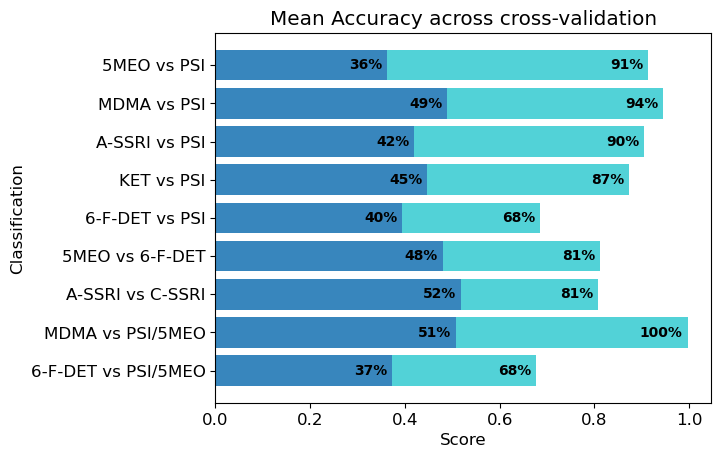

In [20]:
pf.plot_cross_model_Accuracy(scoreNames_sorted, meanScores_sorted, meanScrambleScores_sorted, colorsList, 'C:\\OneDrive\\KwanLab\\Lightsheet_cFos_Pipeline\\figureScripts\\')

# Mean AUC

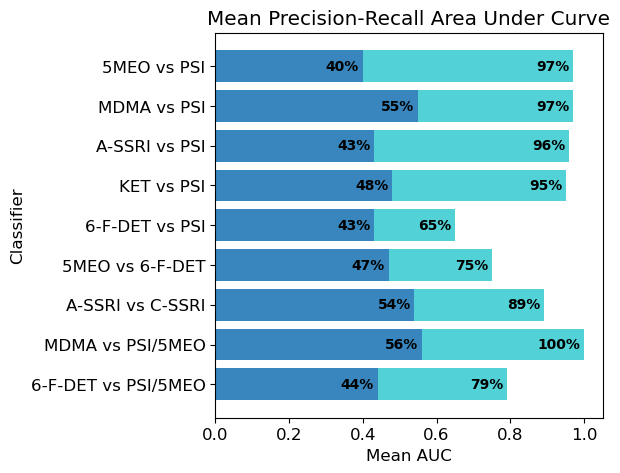

In [21]:
pf.plot_cross_model_AUC(scoreNames_sorted, aucScores_sorted, aucScrambleScores_sorted, colorsList, 'C:\\OneDrive\\KwanLab\\Lightsheet_cFos_Pipeline\\figureScripts\\')

# Violin Plot showing feature counts per split

In [22]:
colorsList = [[82, 211, 216], [56, 135, 190]]
colorsList = np.array(colorsList)/256

